In [ ]:
from load_data import *
from feature_creation import *
from xgboost import XGBClassifier
from matplotlib import pyplot as plt
from model_predictions import *
from explanation import *

In [2]:
consTrain, acctTrain, inflowsTrain, outflowsTrain = load_training_data()
XTrain, yTrain, cat_percent_model, cat_income_model = create_features(consTrain, acctTrain, inflowsTrain, outflowsTrain)

Index(['ACCOUNT_FEES', 'ATM_CASH', 'AUTOMOTIVE', 'BILLS_UTILITIES', 'BNPL',
       'CHILD_DEPENDENTS', 'CREDIT_CARD_PAYMENT', 'EDUCATION', 'ENTERTAINMENT',
       'ESSENTIAL_SERVICES', 'EXTERNAL_TRANSFER', 'FOOD_AND_BEVERAGES',
       'GENERAL_MERCHANDISE', 'GIFTS_DONATIONS', 'GROCERIES',
       'HEALTHCARE_MEDICAL', 'HOME_IMPROVEMENT', 'INSURANCE', 'LOAN',
       'MORTGAGE', 'OVERDRAFT', 'PAYCHECK', 'PETS', 'RENT', 'SELF_TRANSFER',
       'TAX', 'TRAVEL', 'UNCATEGORIZED'],
      dtype='object', name='category_description')


In [3]:
best_thresh = evaluate_features(XTrain,yTrain)

Best Threshold=0.00658737, Best AUC=0.862, Best Accuracy=84.06%


In [4]:
selection_model, selection = train_model(XTrain,yTrain, best_thresh)

Index(['checking_month2_EMA', 'checking_month3_EMA', 'checking_month4_EMA',
       'checking_month5_EMA', 'checking_month6_EMA', 'checking_month7_EMA',
       'checking_month2_SMA', 'checking_month3_SMA', 'checking_month4_SMA',
       'checking_month6_SMA', 'checking_month7_SMA', 'SAVINGS_acct_count',
       'CHECKING_balance_std_diff_regress_coeff',
       'CHECKING_balance_std_regress_coeff', 'DEPOSIT_inflow_over_outflow',
       'EXTERNAL_TRANSFER_inflow_over_outflow',
       'INVESTMENT_INCOME_inflow_over_outflow', 'PAYCHECK_inflow_over_outflow',
       'REFUND_inflow_over_outflow', 'SELF_TRANSFER_inflow_over_outflow',
       'SMALL_DOLLAR_ADVANCE_inflow_over_outflow', 'TAX_inflow_over_outflow',
       'EXTERNAL_TRANSFER_inflow_over_inflow', 'LOAN_inflow_over_inflow',
       'MISCELLANEOUS_inflow_over_inflow', 'REFUND_inflow_over_inflow',
       'SMALL_DOLLAR_ADVANCE_inflow_over_inflow', 'TAX_inflow_over_inflow',
       'DEPOSIT_inflow_over_income', 'EXTERNAL_TRANSFER_inflow_over_i

In [5]:
consTest, acctTest, inflowsTest, outflowsTest = load_holdout_data()

In [6]:
XTest = create_features(consTest, acctTest, inflowsTest, outflowsTest, False, cat_percent_model, cat_income_model)

Index(['ACCOUNT_FEES', 'ATM_CASH', 'AUTOMOTIVE', 'BILLS_UTILITIES', 'BNPL',
       'CHILD_DEPENDENTS', 'CREDIT_CARD_PAYMENT', 'EDUCATION', 'ENTERTAINMENT',
       'ESSENTIAL_SERVICES', 'EXTERNAL_TRANSFER', 'FOOD_AND_BEVERAGES',
       'GENERAL_MERCHANDISE', 'GIFTS_DONATIONS', 'GROCERIES',
       'HEALTHCARE_MEDICAL', 'HOME_IMPROVEMENT', 'INSURANCE', 'LOAN',
       'MORTGAGE', 'OVERDRAFT', 'PAYCHECK', 'PETS', 'RENT', 'SELF_TRANSFER',
       'TAX', 'TRAVEL', 'UNCATEGORIZED'],
      dtype='object', name='category_description')


In [7]:
predictions, reasons = run_model(selection_model , selection, XTest)

Index(['checking_month2_EMA', 'checking_month3_EMA', 'checking_month4_EMA',
       'checking_month5_EMA', 'checking_month6_EMA', 'checking_month7_EMA',
       'checking_month2_SMA', 'checking_month3_SMA', 'checking_month4_SMA',
       'checking_month6_SMA', 'checking_month7_SMA', 'SAVINGS_acct_count',
       'CHECKING_balance_std_diff_regress_coeff',
       'CHECKING_balance_std_regress_coeff', 'DEPOSIT_inflow_over_outflow',
       'EXTERNAL_TRANSFER_inflow_over_outflow',
       'INVESTMENT_INCOME_inflow_over_outflow', 'PAYCHECK_inflow_over_outflow',
       'REFUND_inflow_over_outflow', 'SELF_TRANSFER_inflow_over_outflow',
       'SMALL_DOLLAR_ADVANCE_inflow_over_outflow', 'TAX_inflow_over_outflow',
       'EXTERNAL_TRANSFER_inflow_over_inflow', 'LOAN_inflow_over_inflow',
       'MISCELLANEOUS_inflow_over_inflow', 'REFUND_inflow_over_inflow',
       'SMALL_DOLLAR_ADVANCE_inflow_over_inflow', 'TAX_inflow_over_inflow',
       'DEPOSIT_inflow_over_income', 'EXTERNAL_TRANSFER_inflow_over_i

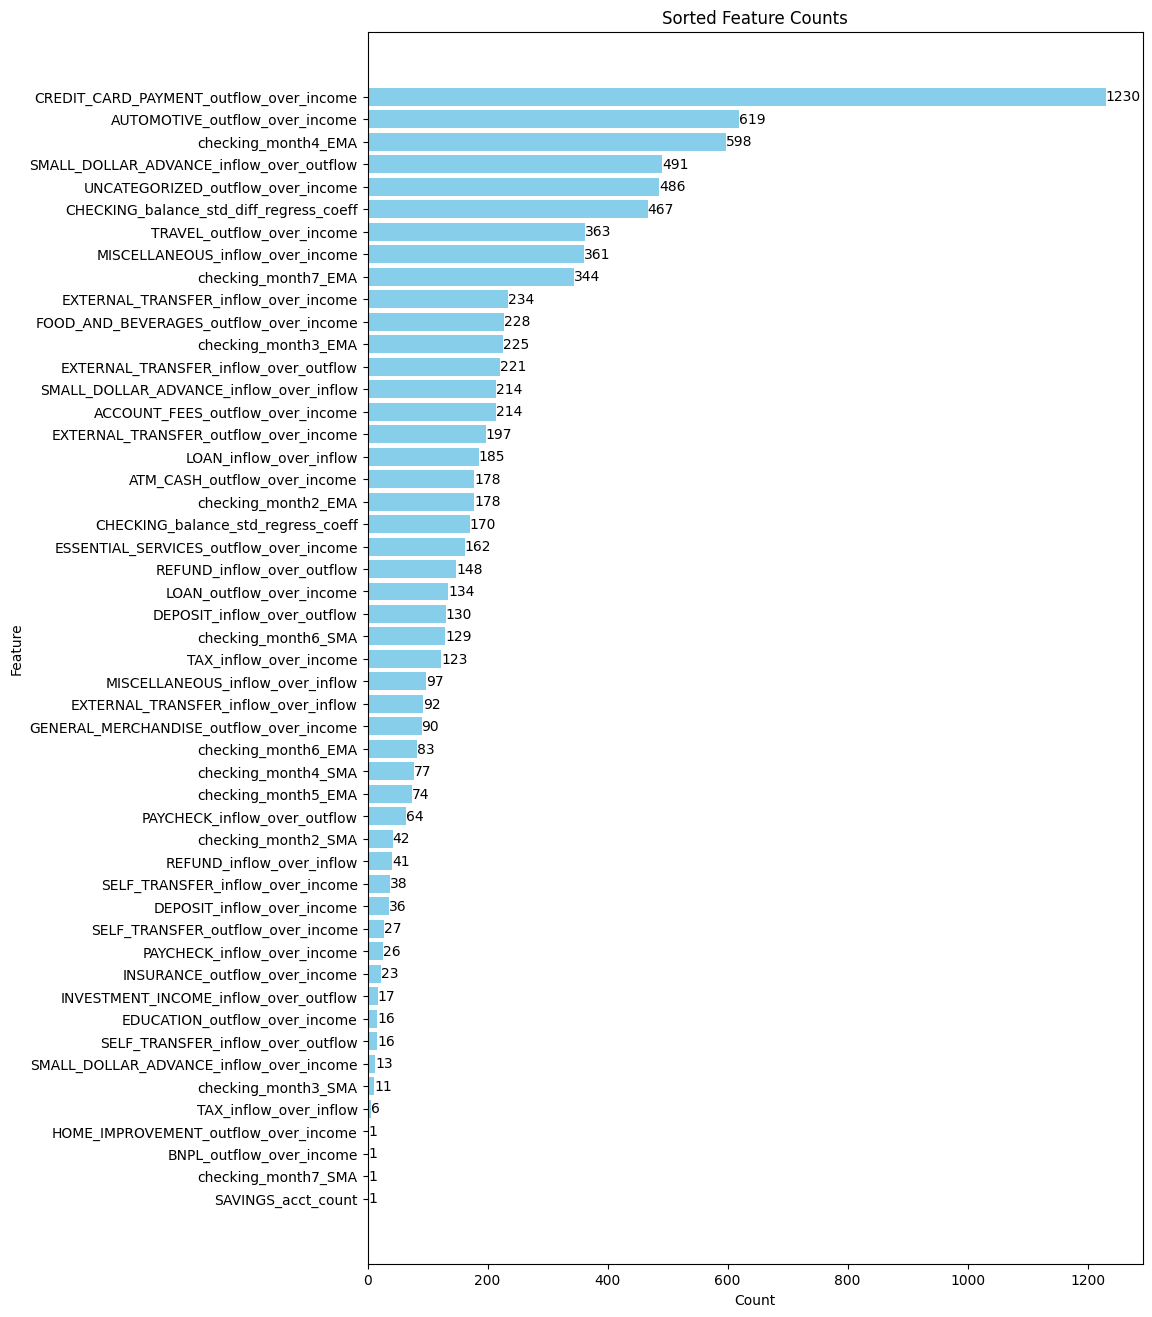

In [8]:
explanation(reasons)

In [9]:
# from collections import Counter
# features = [j[0] for r in reason for j in r]
# feature_counts = Counter(features)

In [10]:
# # Sort features by their counts
# sorted_features = sorted(feature_counts.items(), key=lambda x: x[1])
# sorted_feature_names = [feature[0] for feature in sorted_features]
# sorted_feature_counts = [feature[1] for feature in sorted_features]

# # Plot the sorted value counts
# plt.figure(figsize=(10, 16))
# plt.barh(sorted_feature_names, sorted_feature_counts, color='skyblue')
# plt.xlabel('Count')
# plt.ylabel('Feature')
# plt.title('Sorted Feature Counts')

# for i, count in enumerate(sorted_feature_counts):
#     plt.text(count, i, str(count), ha='left', va='center', color='black')

# plt.savefig('most_common_reasons.png', bbox_inches='tight')
# plt.show()